# Problem 1


In [81]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

drink = pd.read_csv("data/strongdrink.txt")

In [82]:
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [83]:
drink.isnull().sum()
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
cultivar      176 non-null int64
alco          176 non-null float64
malic         176 non-null float64
ash           176 non-null float64
alk           176 non-null float64
magn          176 non-null int64
tot_phen      176 non-null float64
flav          176 non-null float64
nonfl_phen    176 non-null float64
proanth       176 non-null float64
color_int     176 non-null float64
hue           176 non-null float64
OD280rat      176 non-null float64
proline       176 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.3 KB


## (a)

In [84]:
X = drink[['alco', 'malic', 'tot_phen', 'color_int']]
y = drink[['cultivar']]
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    test_size = 0.25, random_state = 20)
MultLogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
MultLogReg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
y_pred = MultLogReg.predict(X_test)

In [86]:
result = MultLogReg.fit(X_train, y_train.values.ravel())
result.coef_

array([[ 1.70042787, -0.26560797,  1.22389494,  0.02275098],
       [-1.46801414, -0.3330517 ,  0.66400715, -0.92271023],
       [-0.23241339,  0.59865977, -1.88790211,  0.89995931]])

In [55]:
print("Coefficients for j = 1 is: {}.\nCoefficients for j = 2 is: {}. \n".format(result.coef_[0], result.coef_[1]))

print(classification_report(y_test, y_pred), '\n')
print(f'Validation set MSE = {mean_squared_error(y_test, y_pred)}')

Coefficients for j = 1 is: [ 1.70042672 -0.26560787  1.22389491  0.02275121].
Coefficients for j = 2 is: [-1.46801544 -0.33305178  0.66400736 -0.92271032]. 

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44
 

Validation set MSE = 0.045454545454545456


The model is the best at predicting category 2. Yes, it is the one with the most observations.

## (b)


In [87]:
from sklearn import model_selection
loo = model_selection.LeaveOneOut()
Xvals = X.values
yvals = y.values
N_loo = Xvals.shape[0]
loo.get_n_splits(Xvals)

MSE = pd.DataFrame({'index': np.zeros(N_loo), 
                    'error': np.zeros(N_loo), 
                    'y_pred': np.zeros(N_loo),
                    'y_test': np.zeros(N_loo)})

# This loop will take 20 or 30 seconds
for train_index, test_index in loo.split(Xvals):
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE['index'][test_index] = test_index
    MSE['error'][test_index] = (((y_test - y_pred) ** 2) != 0).astype(int)
    MSE['y_pred'][test_index] = y_pred
    MSE['y_test'][test_index] = y_test



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
err_1 = MSE[MSE['y_pred'] == 1]['error'].mean()
err_2 = MSE[MSE['y_pred'] == 2]['error'].mean()
err_3 = MSE[MSE['y_pred'] == 3]['error'].mean()
Gen_MSE = MSE['error'].mean()
print(classification_report(MSE['y_test'], MSE['y_pred'], digits=3))
print('The error rate for class 1 is', err_1, ', std is', MSE[MSE['y_pred'] == 1]['error'].std())
print('The error rate for class 2 is', err_2, ', std is', MSE[MSE['y_pred'] == 2]['error'].std())
print('The error rate for class 3 is', err_3, ', std is', MSE[MSE['y_pred'] == 3]['error'].std())
print('The average MSE (for all classes) is', Gen_MSE,
      ', std is', MSE['error'].std())

             precision    recall  f1-score   support

        1.0      0.902     0.932     0.917        59
        2.0      0.914     0.901     0.908        71
        3.0      0.956     0.935     0.945        46

avg / total      0.921     0.920     0.921       176

The error rate for class 1 is 0.09836065573770492 , std is 0.3002730997379377
The error rate for class 2 is 0.08571428571428572 , std is 0.2819629507400967
The error rate for class 3 is 0.044444444444444446 , std is 0.20840907713999288
The average MSE (for all classes) is 0.07954545454545454 , std is 0.2713602101199873


Compared with part (a), the error rate for j = 1 is smaller, but error rates for j = 2 and j = 3 are larger. 
Also, the average MSE is larger. 

## (c)

In [92]:
from sklearn.model_selection import KFold

k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
kf.get_n_splits(Xvals)

MSE_vec_kf = np.zeros(k)


k_ind = int(0)
for train_index, test_index in kf.split(Xvals):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print('k index=', k_ind)
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    print(classification_report(y_test, y_pred))
    k_ind += 1



k index= 0
MSE for test set 0  is 0.634297520661
             precision    recall  f1-score   support

          1       0.71      1.00      0.83        12
          2       1.00      0.75      0.86        24
          3       0.78      0.88      0.82         8

avg / total       0.88      0.84      0.84        44

k index= 1
MSE for test set 1  is 0.67097107438
             precision    recall  f1-score   support

          1       1.00      0.76      0.87        17
          2       0.69      1.00      0.81        11
          3       1.00      0.94      0.97        16

avg / total       0.92      0.89      0.89        44

k index= 2
MSE for test set 2  is 0.663223140496
             precision    recall  f1-score   support

          1       0.94      1.00      0.97        15
          2       0.94      0.94      0.94        16
          3       1.00      0.92      0.96        13

avg / total       0.96      0.95      0.95        44

k index= 3
MSE for test set 3  is 0.640495867769
 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
print('test estimate MSE k-fold=', MSE_kf/k)
print('The error rate for j = 1 is', 1 - (0.71 + 1.00 + 0.94 + 0.88)/4, '\n')
print('The error rate for j = 2 is', 1 - (1.00 + 0.69 + 0.94 + 1.00)/4, "\n")
print('The error rate for j = 3 is', 1 - (0.78 + 1.00 + 1.00 + 1.00)/4)


test estimate MSE k-fold= 0.163061725207
The error rate for j = 1 is 0.11750000000000005 

The error rate for j = 2 is 0.09250000000000003 

The error rate for j = 3 is 0.05499999999999994


# Problem 2
## (a)

In [100]:
from pandas import tseries, DataFrame
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set_style('whitegrid')

In [98]:
cool = pd.read_csv('data/CoolIndex.txt', header = None, 
                   names = np.array(['age', 'cool']))

cool.head()

,age,cool
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


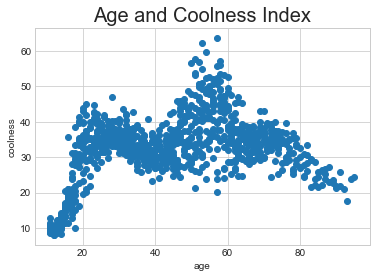

In [101]:
age = cool.age
cool = cool.cool
plt.scatter(age, cool)
plt.title('Age and Coolness Index', fontsize=20)
plt.xlabel('age')
plt.ylabel('coolness')
plt.show()


## (b)

In [103]:
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age <= 95)).astype(int)
X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))
X_step.describe()


,age_bin1,age_bin2,age_bin3,age_bin4,age_bin5
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,0.162134,0.276151,0.285565,0.217573,0.058577
std,0.368767,0.447326,0.451919,0.412812,0.234955
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
reg2 = sm.OLS(endog = cool, exog = X_step, missing='drop')
reg2_results = reg2.fit()
print(reg2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cool   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 18 Feb 2018   Prob (F-statistic):          3.73e-114
Time:                        23:30:02   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.562     35.746      0.0

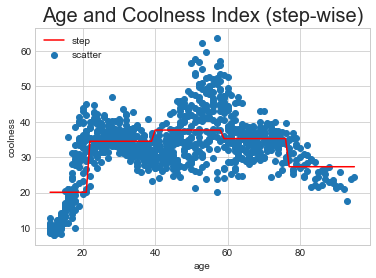

In [105]:
plt.title('Age and Coolness Index (step-wise)', fontsize=20)
plt.xlabel('age')
plt.ylabel('coolness')
plt.scatter(age, cool, label = 'scatter')
plt.plot(age, reg2_results.predict(X_step), 'r-', label = 'step')
plt.legend(loc='upper left')
plt.show()


In [106]:
b1, b2, b3, b4, b5 = reg2_results.params
print("b1 = {}, b2 = {}, b3 = {}, b4 = {}, b5 = {}.\n ".format(b1, b2, b3, b4, b5))
print("The predicted value for a 73-year-old is", b4)

b1 = 20.102457252090748, b2 = 34.475788077559386, b3 = 37.63510549244962, b4 = 35.225400040242754, b5 = 27.296378244321282.
 
The predicted value for a 73-year-old is 35.2254000402


## (c)

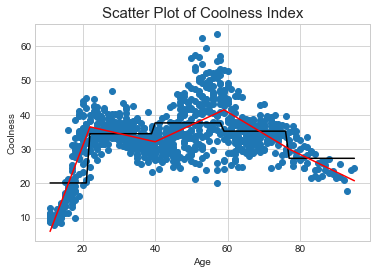

In [115]:
from scipy.interpolate import make_lsq_spline, BSpline, \
make_interp_spline, LSQUnivariateSpline

knots = [22, 40, 59, 77]
spl_cool1 = LSQUnivariateSpline(age.values, cool.values, knots, k=1)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
plt.scatter(age, cool, label = "coolness")
plt.title('Scatter Plot of Coolness Index', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Coolness')


plt.plot(age, reg2_results.predict(X_step), 'k-', label = 'step')
plt.plot(age_vec, spl_cool1(age_vec), 'r-')
plt.show()

In [116]:
print("The predicted value for a 73-year-old is", spl_cool1(73))

The predicted value for a 73-year-old is 32.536832389143306


## (d)

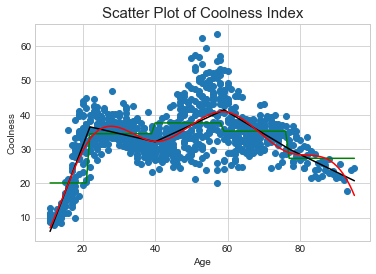

In [117]:
spl_cool3 = LSQUnivariateSpline(age.values, cool.values, knots, k=3)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
plt.scatter(age, cool, label = "coolness")
plt.title('Scatter Plot of Coolness Index', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Coolness')


plt.plot(age, reg2_results.predict(X_step), 'g-', label = 'step')
plt.plot(age_vec, spl_cool1(age_vec), 'k-')
plt.plot(age_vec, spl_cool3(age_vec), 'r-')
plt.show()

In [118]:
print("The predicted value for a 73-year-old is", spl_cool3(73))

The predicted value for a 73-year-old is 31.262429389257864
